In [3]:
import pandas as pd
from selenium import webdriver
import time 
from webdriver_manager.chrome import ChromeDriverManager 
import re 


## Data Collection 

#### Create Driver 

In [4]:
driver = webdriver.Chrome(ChromeDriverManager().install())

/var/folders/g2/tz8mrjyx0bd21mkwkqx_jn840000gn/T/ipykernel_3672/1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [5]:
page_url = 'https://bakerstreet.fandom.com/wiki/Category:Characters:_Canon'

In [6]:
driver.get(page_url)

#### Find Books 

In [7]:
from selenium.webdriver.common.by import By

book_categories = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

In [8]:
len(book_categories)

24

In [9]:
for category in book_categories:
    print(category.text)

Category:Characters: A Study in Scarlet
Irene Adler
Category:Characters: The Adventures of Sherlock Holmes
Baker Street Irregulars
Inspector Bradstreet
Category:Characters: The Case-Book of Sherlock Holmes
Category:Characters: The Sign of the Four
Category:Characters: The Valley of Fear
Charles I of England
Tobias Gregson
Category:Characters: His Last Bow
Mycroft Holmes
Sherlock Holmes
Stanley Hopkins
Category:Characters: The Hound of the Baskervilles
Mrs Hudson
Inspector Lestrade
Alec MacDonald
Category:Characters: The Memoirs of Sherlock Holmes
Category:Characters: The Return of Sherlock Holmes
Queen Victoria
Fritz von Waldbaum
John Watson
Wiggins


In [10]:
# write a loop to extract the items that are not category 

book_categories_u = []

for category in book_categories:
    cate_name = category.text
    x = re.search("Category", cate_name)
    if x:
        print(category.text)
        book_categories_u.append(category)

Category:Characters: A Study in Scarlet
Category:Characters: The Adventures of Sherlock Holmes
Category:Characters: The Case-Book of Sherlock Holmes
Category:Characters: The Sign of the Four
Category:Characters: The Valley of Fear
Category:Characters: His Last Bow
Category:Characters: The Hound of the Baskervilles
Category:Characters: The Memoirs of Sherlock Holmes
Category:Characters: The Return of Sherlock Holmes


In [11]:
for cate in book_categories_u:
    print(cate.text)

Category:Characters: A Study in Scarlet
Category:Characters: The Adventures of Sherlock Holmes
Category:Characters: The Case-Book of Sherlock Holmes
Category:Characters: The Sign of the Four
Category:Characters: The Valley of Fear
Category:Characters: His Last Bow
Category:Characters: The Hound of the Baskervilles
Category:Characters: The Memoirs of Sherlock Holmes
Category:Characters: The Return of Sherlock Holmes


In [14]:
books = []

for category in book_categories_u:
    book_url = category.get_attribute('href')
    book_name = category.text 
    books.append({'book_name' : book_name, 'url': book_url})

In [15]:
books

[{'book_name': 'Category:Characters: A Study in Scarlet',
  'url': 'https://bakerstreet.fandom.com/wiki/Category:Characters:_A_Study_in_Scarlet'},
 {'book_name': 'Category:Characters: The Adventures of Sherlock Holmes',
  'url': 'https://bakerstreet.fandom.com/wiki/Category:Characters:_The_Adventures_of_Sherlock_Holmes'},
 {'book_name': 'Category:Characters: The Case-Book of Sherlock Holmes',
  'url': 'https://bakerstreet.fandom.com/wiki/Category:Characters:_The_Case-Book_of_Sherlock_Holmes'},
 {'book_name': 'Category:Characters: The Sign of the Four',
  'url': 'https://bakerstreet.fandom.com/wiki/Category:Characters:_The_Sign_of_the_Four'},
 {'book_name': 'Category:Characters: The Valley of Fear',
  'url': 'https://bakerstreet.fandom.com/wiki/Category:Characters:_The_Valley_of_Fear'},
 {'book_name': 'Category:Characters: His Last Bow',
  'url': 'https://bakerstreet.fandom.com/wiki/Category:Characters:_His_Last_Bow'},
 {'book_name': 'Category:Characters: The Hound of the Baskervilles',

In [16]:
character_list = []
for book in books:
    # go to the book page 
    driver.get(book['url'])
    
    character_elems = driver.find_elements(By.CLASS_NAME, "category-page__member-link")
    
    for elems in character_elems:
        character_list.append({'book_name' : book['book_name'], 'character_name': elems.text})
    
    

In [20]:
character_df = pd.DataFrame( character_list)
character_df

,book_name,character_name
0,Category:Characters: A Study in Scarlet,Enoch Drebber
1,Category:Characters: A Study in Scarlet,John Ferrier
2,Category:Characters: A Study in Scarlet,Lucy Ferrier
3,Category:Characters: A Study in Scarlet,Jefferson Hope
4,Category:Characters: A Study in Scarlet,Edgar Allan Poe
...,...,...
173,Category:Characters: The Return of Sherlock Ho...,The Pope
174,Category:Characters: The Return of Sherlock Ho...,Lord Saltire
175,Category:Characters: The Return of Sherlock Ho...,Abe Slaney
176,Category:Characters: The Return of Sherlock Ho...,James Walter


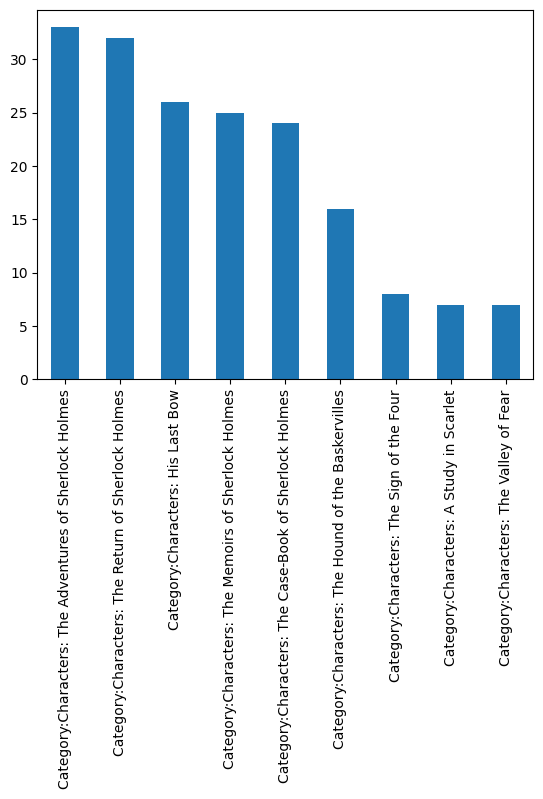

In [26]:
import matplotlib.pyplot as plt

# which book have the most character
character_df['book_name'].value_counts().plot(kind="bar")
plt.show()